In [1]:
#### Description and imports
import swyft
import pandas as pd
from matplotlib import pyplot as plt

### This specifies the path to your config file
path_to_config = '../examples/config_files/agnostic_sgwb.ini'

### This specifies the path to your logratios file
path_to_logratios = '../sgwb_agnostic/logratios_sgwb_agnostic/logratios_R1'

In [2]:
### This cell print the config file
with open(path_to_config) as f:
    FF = f.readlines()

for f in FF:
    print(f[:-1])

[DATA OPTIONS]
n_chunks = 100
n_grid = 1000
sampling_frequency = 1e-4
minimum_frequency = 1e-4
maximum_frequency = 1e-2
transient_store = ../transient_store
transient_store_size = 200_000
p_transient = 0.0

[SGWB INJECTION]
amplitude = -11.
tilt_1 = 0.
tilt_2 = 0.
tilt_3 = 3.
tilt_4 = 0.
tilt_5 = 0.


[SGWB PRIORS]
amplitude = -13.,-9.
tilt_1 = -5.,5.
tilt_2 = -5.,5.
tilt_3 = -5.,5.
tilt_4 = -5.,5.
tilt_5 = -5.,5.

[NOISE INJECTION]
TM = 3.
OMS = 15.

[NOISE PRIORS]
TM = 2.,4.
OMS = 13.,17.

[ZARR PARAMS]
run_id = sgwb_agnostic
use_zarr = True
sim_schedule = 20_000
chunk_size = 250
run_parallel = True
njobs = 16
store_path = ../sgwb_agnostic
run_description = Implementation of SGWB analysis for power law templates

[TMNRE]
method = tmnre
one_d = True
marginals = all
num_rounds = 1
infer_only = True
skip_ns = False
resampler = False
noise_targets = data
generate_obs = False
epsilon = 1e-6
logl_th_max = 500.
num_batch_samples = 10
samples_per_slice = 20
num_steps = 4
alpha = 1e-5
obs_pat

In [3]:
### This passes the config to the script to generate observations and executes it
%run generate_observation.py {path_to_config}


             /'{>           Initialising SAQQARA
         ____) (____        --------------------
       //'--;   ;--'\\      Type: Generate Observation
      ///////\_/\\\\\\\     Args: config
             m m            

Thu 14 Sep 17:43:35 | [generate_observation.py] | Reading config file: ../examples/config_files/agnostic_sgwb.ini
Thu 14 Sep 17:43:35 | [generate_observation.py] | Generated observation
Thu 14 Sep 17:43:35 | [generate_observation.py] | Swyft observation Path: ../sgwb_agnostic/observation_sgwb_agnostic
Thu 14 Sep 17:43:35 | [generate_observation.py] | MCMC observation Path: ../sgwb_agnostic/mcmc_observation_sgwb_agnostic


In [4]:
### This passes the config to the script to generate training set + trains the network 
### If data are not there they will be generated, otherwise will not overwrite
### If infer_only is False will retrain the network, if True will just do the inference
%run tmnre.py {path_to_config}

cp: '../sgwb_agnostic/observation_sgwb_agnostic' and '../sgwb_agnostic/observation_sgwb_agnostic' are the same file
/home/mauro/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:467: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
GPU available: True (cuda), used: False



             /'{>           Initialising SAQQARA
         ____) (____        --------------------
       //'--;   ;--'\\      Type: TMNRE Inference
      ///////\_/\\\\\\\     Args: config
             m m            

Thu 14 Sep 17:43:35 | [tmnre.py] | Reading config file: ../examples/config_files/agnostic_sgwb.ini
Thu 14 Sep 17:43:35 | [tmnre.py] | Observation loaded and saved in ../sgwb_agnostic/observation_sgwb_agnostic
Thu 14 Sep 17:43:35 | [tmnre.py] | Initialising zarrstore for round 1
Thu 14 Sep 17:43:35 | [tmnre.py] | Simulating data for round 1
Thu 14 Sep 17:43:35 | [tmnre.py] | Running in parallel - spawning processes
Thu 14 Sep 17:43:35 | [tmnre.py] | Setting up dataloaders for round 1
Thu 14 Sep 17:43:35 | [tmnre.py] | Setting up trainer for round 1


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Thu 14 Sep 17:43:35 | [tmnre.py] | Initialising network for round 1
Thu 14 Sep 17:43:35 | [tmnre.py] | Generate prior samples


/home/mauro/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pytorch_lightning/trainer/setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
/home/mauro/.pyenv/versions/3.8.10/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/100000 [00:00<?, ?it/s]

Restoring states from the checkpoint path at ../sgwb_agnostic/trainer_sgwb_agnostic_R1/epoch=42_val_loss=-3.88_train_loss=-4.21_R1.ckpt
Loaded model weights from checkpoint at ../sgwb_agnostic/trainer_sgwb_agnostic_R1/epoch=42_val_loss=-3.88_train_loss=-4.21_R1.ckpt


Thu 14 Sep 17:43:39 | [tmnre.py] | Generate posterior samples


/home/mauro/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           -3.813322067260742
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Predicting: 0it [00:00, ?it/s]

/home/mauro/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pytorch_lightning/loops/epoch/prediction_epoch_loop.py:173: UserWarning: Lightning couldn't infer the indices fetched for your dataloader.
  warning_cache.warn("Lightning couldn't infer the indices fetched for your dataloader.")


Thu 14 Sep 17:43:55 | [tmnre.py] | Saving logratios from round 1
Thu 14 Sep 17:43:55 | [tmnre.py] | Update bounds from round 1
Thu 14 Sep 17:43:55 | [tmnre.py] | Completed round 1 in 0:00:19.605586.


In [5]:
### This cell loads the simulator 
%run load_simulator.py {path_to_config}


             /'{>           Initialising SAQQARA
         ____) (____        --------------------
       //'--;   ;--'\\      Type: Load Simulator
      ///////\_/\\\\\\\     
             m m            

Thu 14 Sep 17:43:55 | [load_simulator.py] | Reading config file: ../examples/config_files/agnostic_sgwb.ini


In [6]:
### Loads the logratios from the output
logratios = pd.read_pickle(path_to_logratios)

In [7]:
### Loads the injections and builds a vector
truth = np.append( list(conf['injection']['sgwb'].values()), list(conf['injection']['noise'].values()) )

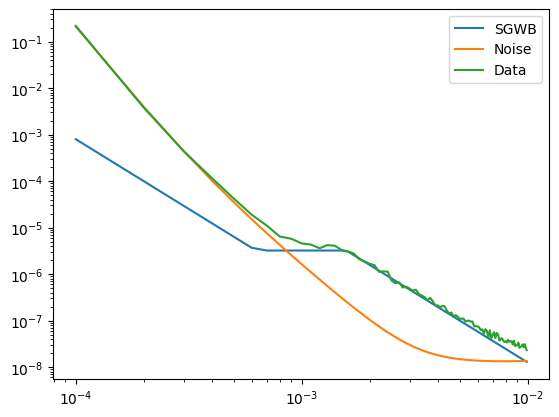

In [8]:
plt.loglog(simulator.f_vec, simulator.sgwb_template(simulator.f_vec, truth[:-2]), label='SGWB')
plt.loglog(simulator.f_vec, simulator.noise_template(simulator.f_vec, truth[-2:]), label='Noise')
plt.loglog(simulator.f_vec, obs['data'], label='Data')
plt.legend(loc=1);

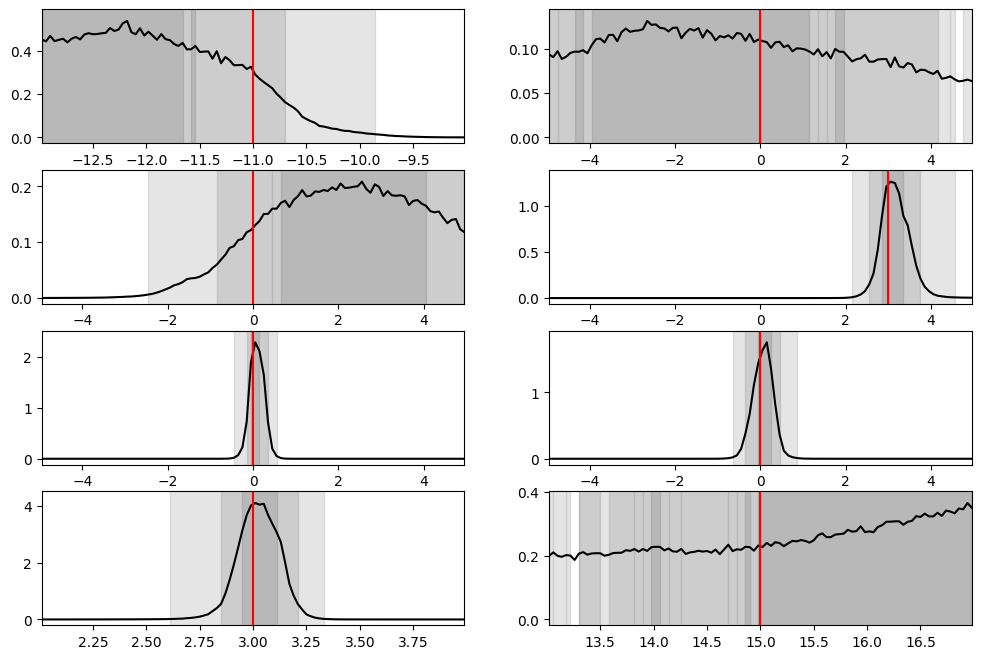

In [9]:
### This cell plots the results
fig = plt.figure(figsize=(12, 8))
for i in range(len(truth)):
    ax = plt.subplot(4,2,i+1)
    swyft.plot_1d(logratios, f"z_total[{i}]", ax=ax)
    ax.axvline(truth[i], color='red')

# Let's generate a new injection and test that everything works well

In [10]:
### This cell loads the simulator 
%run load_simulator.py {path_to_config}


             /'{>           Initialising SAQQARA
         ____) (____        --------------------
       //'--;   ;--'\\      Type: Load Simulator
      ///////\_/\\\\\\\     
             m m            

Thu 14 Sep 17:43:57 | [load_simulator.py] | Reading config file: ../examples/config_files/agnostic_sgwb.ini


In [11]:
### This generates a new injection
new_obs = simulator.sample()

In [12]:
### This cell loads the pretrained network, the last number is an integer specifying the inference rounds 
### larger number leads to a better zoom in around the peak
%run load_network.py {path_to_config} 1


             /'{>           Initialising SAQQARA
         ____) (____        --------------------
       //'--;   ;--'\\      Type: Load Network
      ///////\_/\\\\\\\     Args: config, round
             m m            

Thu 14 Sep 17:43:57 | [load_network.py] | Reading config file: ../examples/config_files/agnostic_sgwb.ini


  0%|          | 0/32 [00:00<?, ?it/s]

/home/mauro/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:467: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/mauro/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pytorch_lightning/trainer/setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
/home/mauro/.pyenv/versions/3.8.10/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature und

Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           -3.599395751953125
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Thu 14 Sep 17:43:57 | [load_network.py] | Loaded network from checkpoint: ../sgwb_agnostic/trainer_sgwb_agnostic_R1/epoch=42_val_loss=-3.88_train_loss=-4.21_R1.ckpt


In [13]:
### This computes the logratios for the new injection point
new_logratios = trainer.infer(network, new_obs, prior_samples.get_dataloader(batch_size=2048))

Predicting: 0it [00:00, ?it/s]

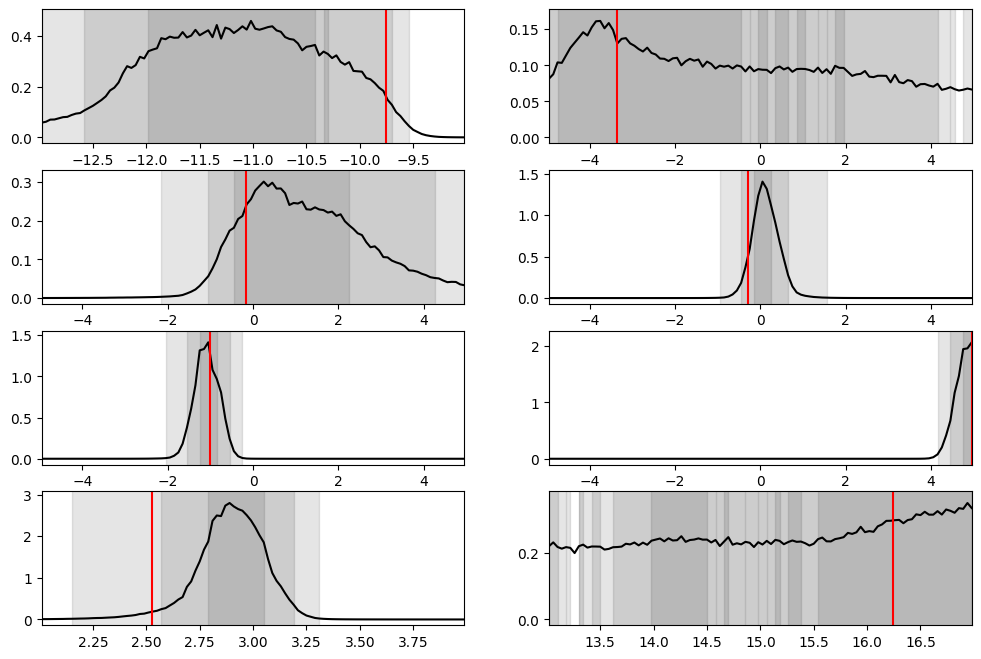

In [14]:
### This cell plots the results
fig = plt.figure(figsize=(12, 8))
for i in range(len(truth)):
    ax = plt.subplot(4,2,i+1)
    swyft.plot_1d(new_logratios, f"z_total[{i}]", ax=ax)
    ax.axvline(new_obs['z_total'][i], color='red')

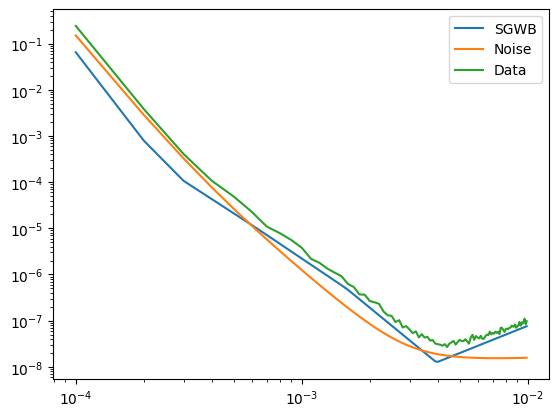

In [15]:
plt.loglog(simulator.f_vec, new_obs['temp_sgwb'], label='SGWB')
plt.loglog(simulator.f_vec, new_obs['temp_noise'], label='Noise')
plt.loglog(simulator.f_vec, new_obs['data'], label='Data')
plt.legend(loc=1);